# Nueral Network Example with 'pima-indians-diabetes.csv'

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense

In [2]:
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv('pima-indians-diabetes.csv', delimiter=',',names=columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Value for cols 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' cannot be zero.

In [5]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [6]:
for i in cols:
    median_value = df[i].median()
    df[i] = df[i].replace(0,median_value)
    #df[i].fillna(median_value, inplace=True)
    #print(median_value)

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

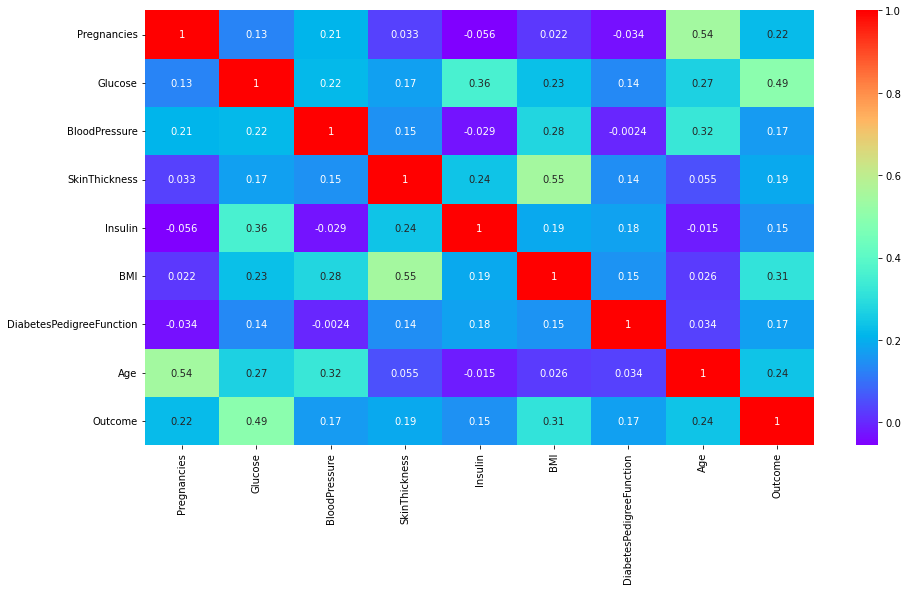

In [9]:
#Showing correlation among all.
plt.subplots(figsize=(15,8))

sns.heatmap(df.corr(),annot=True,cmap='rainbow')

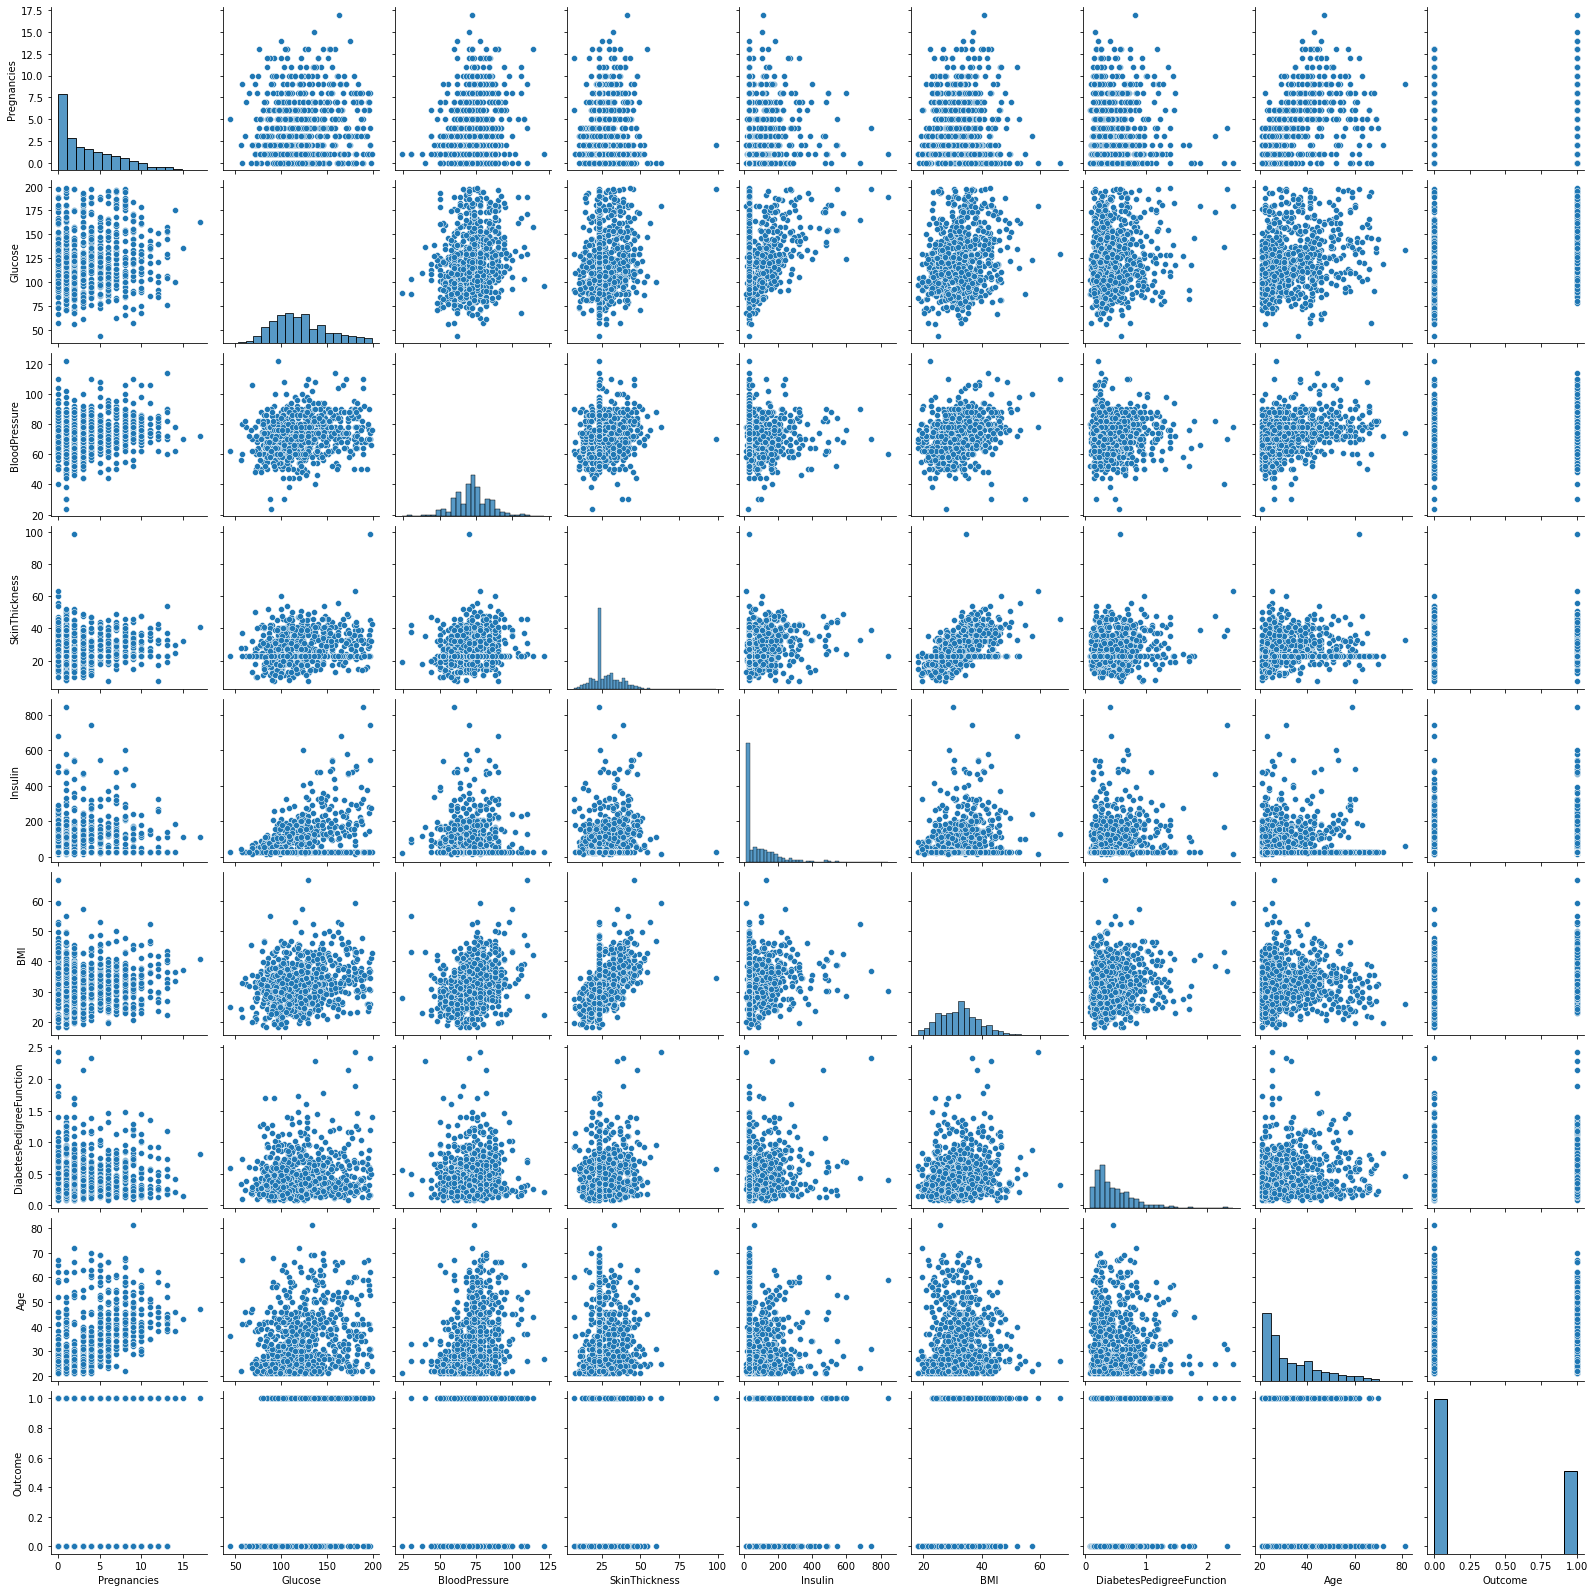

In [10]:
#Scatter plots among all columns
sns.pairplot(df)

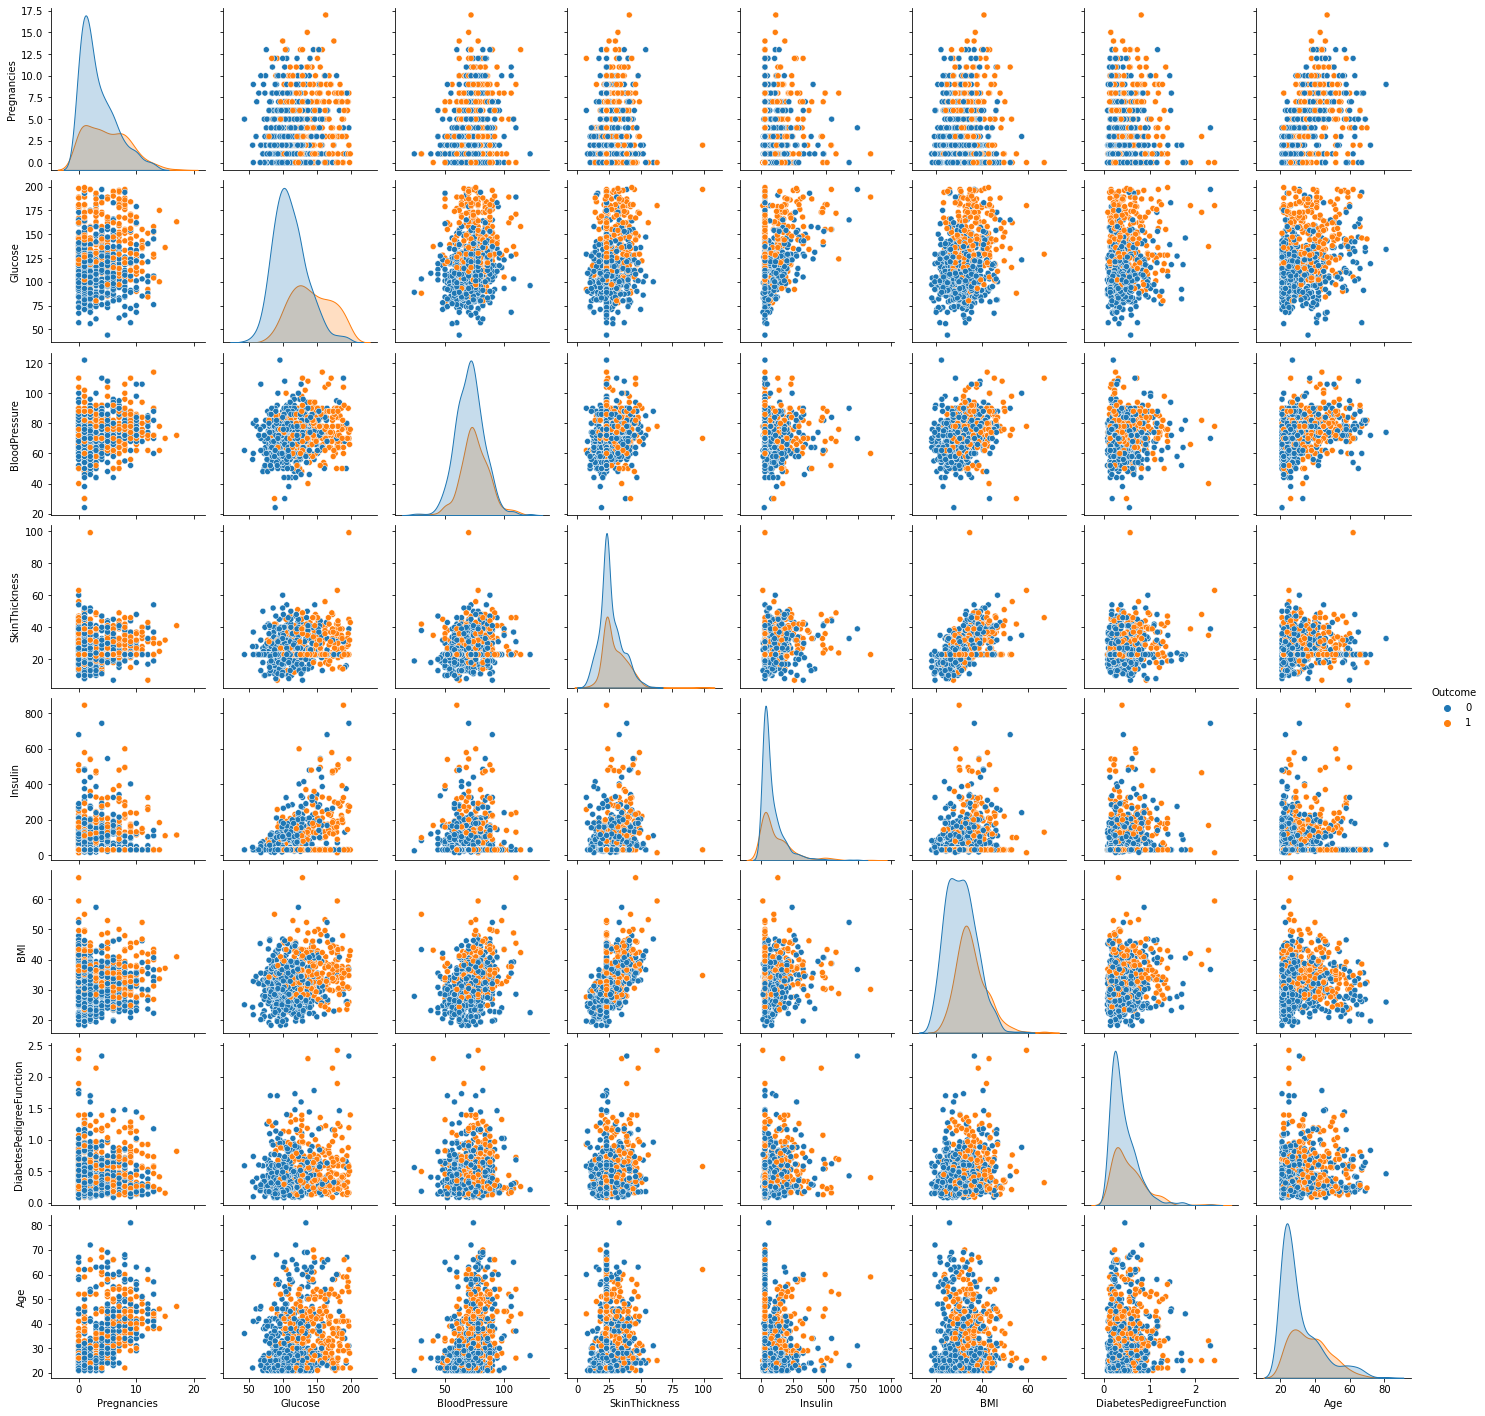

In [11]:
#Showing Outcome relation with other columns
sns.pairplot(df,hue='Outcome')

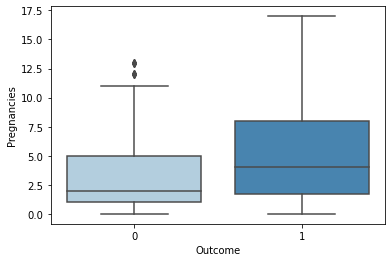

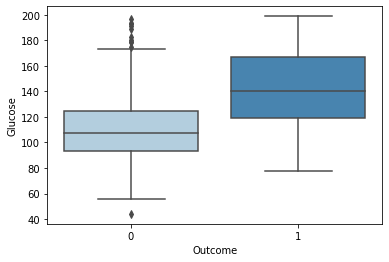

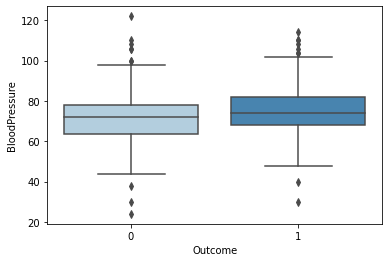

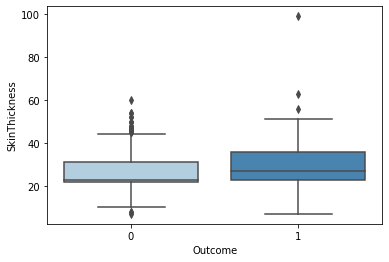

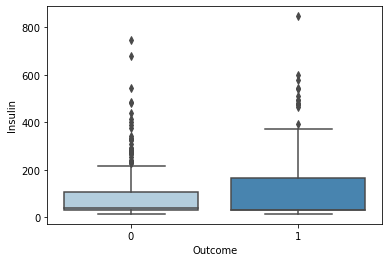

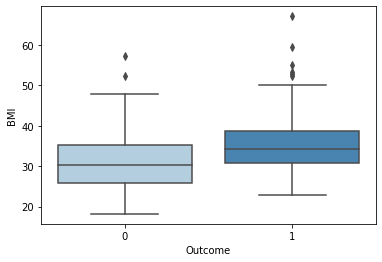

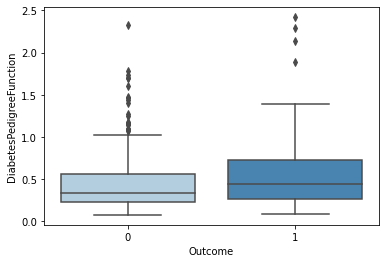

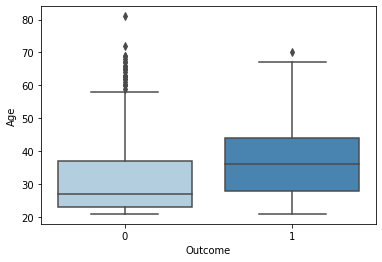

In [12]:
#Box plots of all coulmns with outomce columns
def boxplot(df: pd.DataFrame) -> None:
    
#Visualize a boxplot for each feature for each class.

    fig, axis = plt.subplots()

    for col in df.columns:
        if col != 'Outcome':
            sns.boxplot(x='Outcome', y=col, data=df, palette='Blues')
            plt.show()
            

boxplot(df=df)

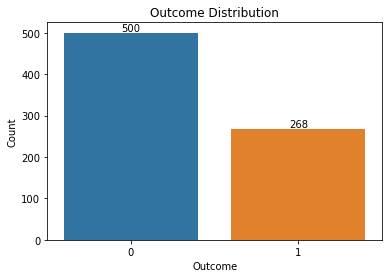

In [13]:
# Outcome Distribution
ax = sns.countplot(data=df, x='Outcome')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Add labels and title to the plot
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribution')

# Display the plot
plt.show()

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


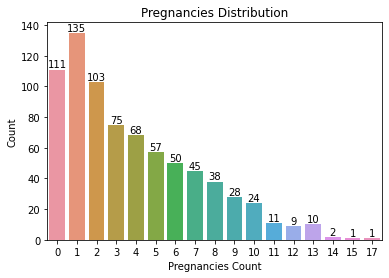

In [14]:
#Pregnancies Distribution

ax = sns.countplot(df['Pregnancies'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Add labels and title to the plot
plt.xlabel('Pregnancies Count')
plt.ylabel('Count')
plt.title('Pregnancies Distribution')

# Display the plot
plt.show()

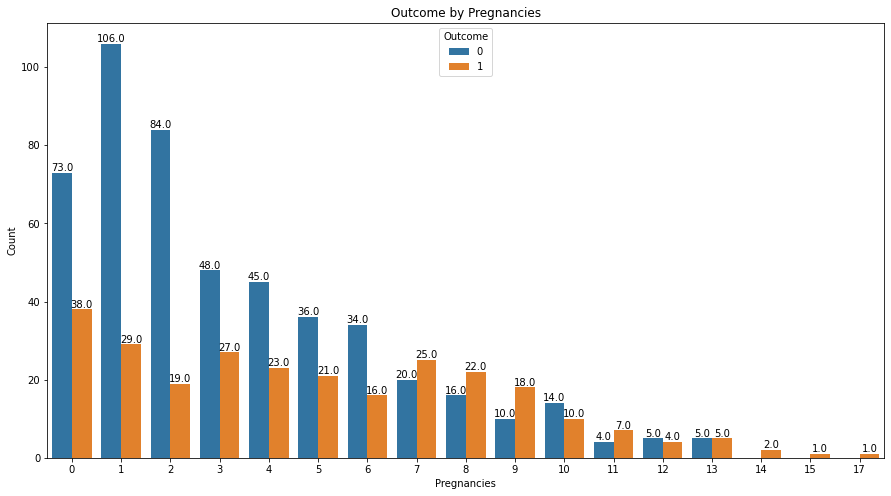

In [15]:
#Outcome by Pregnancies Distribution
plt.subplots(figsize=(15,8))
ax = sns.countplot(x='Pregnancies', hue='Outcome', data=df)

# Add labels and title to the plot
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Outcome by Pregnancies')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.show()

# Feature Engineering

In [16]:
# Specify the column names to be scaled
columns_to_scale = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.501008,0.493742,0.221029,0.096938,0.291430,0.168179,0.204015,0.348958
std,3.369578,0.196376,0.123435,0.100315,0.126860,0.140601,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.359677,0.408163,0.173913,0.019832,0.190184,0.070773,0.050000,0.000000
50%,3.000000,0.470968,0.489796,0.173913,0.020733,0.282209,0.125747,0.133333,0.000000
75%,6.000000,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [19]:
# define the keras model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
77/77 [==============================] - 0s 689us/step - loss: 0.7162 - accuracy: 0.4505
Epoch 2/100
77/77 [==============================] - 0s 671us/step - loss: 0.6776 - accuracy: 0.6562
Epoch 3/100
77/77 [==============================] - 0s 639us/step - loss: 0.6531 - accuracy: 0.6458
Epoch 4/100
77/77 [==============================] - 0s 629us/step - loss: 0.6234 - accuracy: 0.6536
Epoch 5/100
77/77 [==============================] - 0s 617us/step - loss: 0.5998 - accuracy: 0.6784
Epoch 6/100
77/77 [==============================] - 0s 618us/step - loss: 0.5729 - accuracy: 0.7070
Epoch 7/100
77/77 [==============================] - 0s 616us/step - loss: 0.5500 - accuracy: 0.7266
Epoch 8/100
77/77 [==============================] - 0s 617us/step - loss: 0.5279 - accuracy: 0.7253
Epoch 9/100
77/77 [==============================] - 0s 629us/step - loss: 0.5144 - accuracy: 0.7370
Epoch 10/100
77/77 [==============================] - 0s 615us/step - loss: 0.5007 - accura

In [20]:
loss, accuracy = model.evaluate(X, y)

24/24 [==============================] - 0s 748us/step - loss: 0.4290 - accuracy: 0.7891


In [21]:
print('Loss: %.2f' % (loss*100))
print('Accuracy: %.2f' % (accuracy*100))

Loss: 42.90
Accuracy: 78.91
